In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from ln_utils import *

In [3]:
%matplotlib inline
import seaborn as sns

# Load data

In [4]:
graph_files = []

In [5]:
data_dir = "../LNdata/lncaptures/lngraph/2019/"
graph_files +=  [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f]
MIN_TIME = 1549065601-86400 #Saturday, February 2, 2019 12:00:01 AM
#MAX_TIME = 1552867201 #Monday, March 18, 2019 12:00:01 AM

In [6]:
data_dir = "../LNdata/"
#graph_files = [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f]
graph_files += [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f][5:]
#MIN_TIME = 1552478399 # Wednesday, March 13, 2019 11:59:59 AM
MAX_TIME = 1553947199 # Saturday, March 30, 2019 11:59:59 AM

graph_files = graph_files[:15]
#graph_files

# Calculate ranks of connected nodes

In [7]:
attachments, node_list, scores_list, ranks_list = observe_node_attachements_over_time(graph_files[:-1])

../LNdata/lncaptures/lngraph/2019/1549032366.json 2826 22460
2826 22460 1549033104
2844 20909
Calculate centralities STARTED
Calculate centralities FINISHED
../LNdata/lncaptures/lngraph/2019/1549065601.json 2842 22483
../LNdata/lncaptures/lngraph/2019/1549152001.json 438 16685
../LNdata/lncaptures/lngraph/2019/1549238401.json 418 17162
../LNdata/lncaptures/lngraph/2019/1549324801.json 393 17367
../LNdata/lncaptures/lngraph/2019/1549411201.json 456 18152
../LNdata/lncaptures/lngraph/2019/1549497602.json 494 18534
../LNdata/lncaptures/lngraph/2019/1549584001.json 548 18566
../LNdata/lncaptures/lngraph/2019/1549584001.json 2947 23752
2947 23752 1549587458
2965 21983
Calculate centralities STARTED
Calculate centralities FINISHED
../LNdata/lncaptures/lngraph/2019/1549670401.json 2963 24258
../LNdata/lncaptures/lngraph/2019/1549756801.json 535 19139
../LNdata/lncaptures/lngraph/2019/1549843201.json 516 18935
../LNdata/lncaptures/lngraph/2019/1549929601.json 564 19501
../LNdata/lncaptures/lng

# Analyse ranks of connected nodes

In [8]:
attachments[0].head()

,time,new_node,old_node,betw_rank,degree_rank,pr_rank,w_degree_rank
0,1549059305,0296017a2cfeaf9a6b5700bd0a2d9e550c693436cf2838...,032e04b67641c00444af1d83145c0b63bac8316a6afb8f...,650.0,331.5,813.0,911.0
1,1549061765,030185cb3511bdf8077688b33573a699e0d73d25e6cab6...,02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f...,1.0,1.0,13.0,32.0
2,1549039531,03925bda3dbd4f1c762468845277df792c281a2bc5c355...,0232e20e7b68b9b673fb25f48322b151a93186bffe4550...,18.0,17.0,34.0,30.0
3,1549034222,03ea9ff985ced27ef36fb7fc77e71f476259ca437fffd3...,02009947c197575f5a948e1e4343c41dc2e6122a9bd644...,256.0,1131.5,921.0,1187.0
4,1548978223,03c920c4656dc34377505f08b0ded06efe8eb98005ba5c...,0331f80652fb840239df8dc99205792bba2e559a054699...,2.0,6.0,5.0,25.0


In [19]:
att = attachments[0]

In [40]:
def bin_rank(rank):
    if rank < 10:
        return 1
    elif rank < 100:
        return 2
    else:
        return 3

In [41]:
att["betw_rank_bin"] = att["betw_rank"].apply(bin_rank)

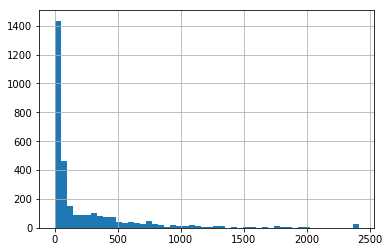

In [42]:
att["betw_rank"].hist(bins=50)

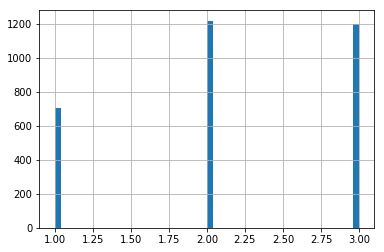

In [43]:
att["betw_rank_bin"].hist(bins=50)

In [9]:
for att in attachments:
    print(att.mean())

time             1.549402e+09
betw_rank        2.361574e+02
degree_rank      2.248970e+02
pr_rank          2.532722e+02
w_degree_rank    2.719421e+02
dtype: float64
time             1.549994e+09
betw_rank        2.957598e+02
degree_rank      2.873543e+02
pr_rank          3.109035e+02
w_degree_rank    3.245965e+02
dtype: float64
time             1.550582e+09
betw_rank        2.122124e+02
degree_rank      2.091430e+02
pr_rank          2.431440e+02
w_degree_rank    2.585178e+02
dtype: float64
time             1.551181e+09
betw_rank        3.222816e+02
degree_rank      3.081714e+02
pr_rank          3.464828e+02
w_degree_rank    3.589936e+02
dtype: float64
time             1.551796e+09
betw_rank        3.567709e+02
degree_rank      3.644460e+02
pr_rank          4.114695e+02
w_degree_rank    4.503604e+02
dtype: float64
time             1.552423e+09
betw_rank        3.086816e+02
degree_rank      3.021285e+02
pr_rank          3.772638e+02
w_degree_rank    4.131235e+02
dtype: float64
time      

### Weekly correlations of popular authority nodes

In [10]:
pop_df = get_attachement_popularity(attachments)

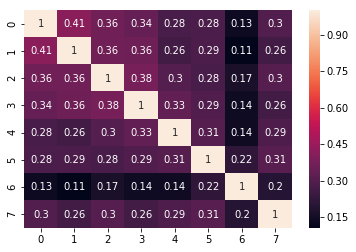

In [11]:
sns.heatmap(corr_mx(pop_df, "spearman"), annot=True)

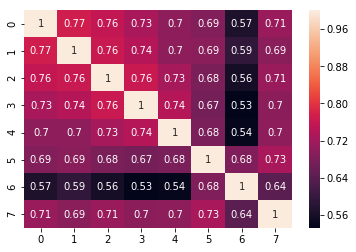

In [12]:
sns.heatmap(corr_mx(pop_df, "wkendall"), annot=True)

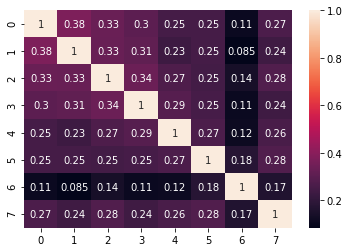

In [13]:
sns.heatmap(corr_mx(pop_df, "kendall"), annot=True)

### Most popular authority nodes:

In [44]:
most_pop = pop_df.rank(ascending=False).mean(axis=1).sort_values()[:20]

In [45]:
most_pop

0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c     1.7500
0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266     4.0000
03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f     7.5000
03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda    12.8125
0232e20e7b68b9b673fb25f48322b151a93186bffe4550045040673797ceca43cf    13.1875
02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b    13.4375
03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d    14.5000
0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4    18.1875
0390b5d4492dc2f5318e5233ab2cebf6d48914881a33ef6a9c6bcdbb433ad986d0    18.9375
03c436af41160a355fc1ed230a64f6a64bcbd2ae50f12171d1318f9782602be601    19.8125
0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3    25.7500
02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8    26.0000
03fb822818be083e0a954db85257a2911a3d55458b8c1ea4124b157e865a836d

#### Betweeness rank of most popular nodes

In [47]:
for node in most_pop.index:
    print(ranks_list[-1]["betw"][node])

1.0
4.0
5.0
8.0
17.0
2.0
15.0
6.0
12.0
57.0
24.0
9.0
16.0
33.0
44.0
28.0
23.0
30.0
41.0
26.0
